In [1]:
import pandas as pd

In [2]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [3]:
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name' : 'MarketingName'}, inplace=True)

In [4]:
dfKetQua = pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id', 'platform','device']], on='use_id')

In [5]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [6]:
dfKetQua = pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')

In [7]:
dfKetQua= pd.merge(dfKetQua, thietbi[['Branding','Model']], left_on='device', right_on='Model')

In [8]:
dfKetQua= pd.merge(dfKetQua, thietbi[['Branding','Model']], left_on='device', right_on='Model', how='left')

In [9]:
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505


In [10]:
dfKetQua.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
5,125.32,38.53,3114.67,22888,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
6,143.81,79.38,9005.49,22908,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
7,61.43,125.51,519.12,22942,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
8,302.11,83.14,1557.33,22965,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
9,360.86,103.92,3114.67,22977,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505


In [11]:
dfKetQua.groupby('Branding_x').agg({
    'outgoing_mins_per_month':'mean',
    'outgoing_sms_per_month':'mean',
    'monthly_mb':'mean',
    'use_id':'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding_x,,,,
HTC,272.779643,98.306500,3316.223071,140
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,4
Motorola,93.220769,61.999615,3659.280000,52
OnePlus,391.747000,45.576000,4775.826000,10
Samsung,181.635794,90.151349,4475.151746,126
Sony,217.038636,41.430909,3798.948636,22


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

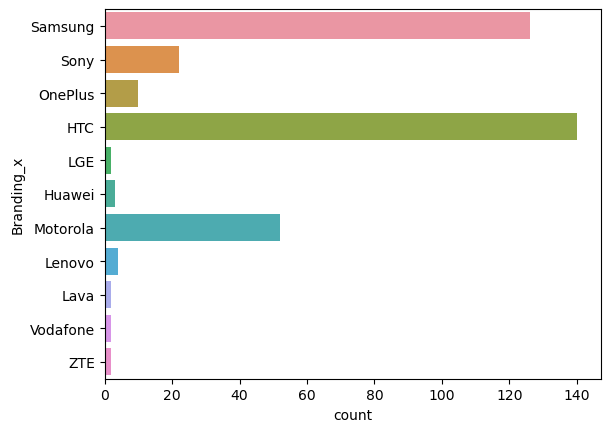

In [13]:
sns.countplot(y='Branding_x', data=dfKetQua)
plt.show()

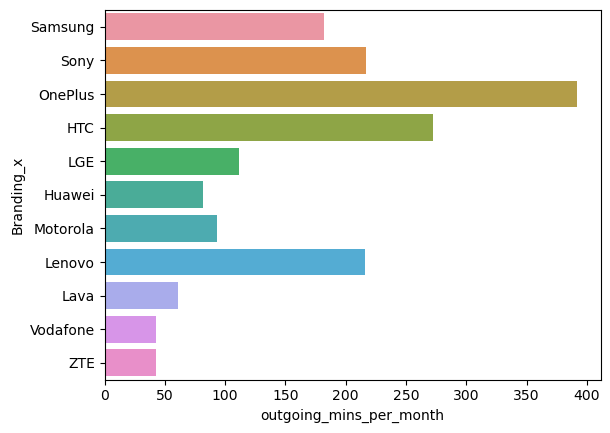

In [14]:
import numpy as np
sns.barplot(y='Branding_x', x='outgoing_mins_per_month', data=dfKetQua, estimator=np.mean, errorbar=None
            ,orient='horizontal')
plt.show()

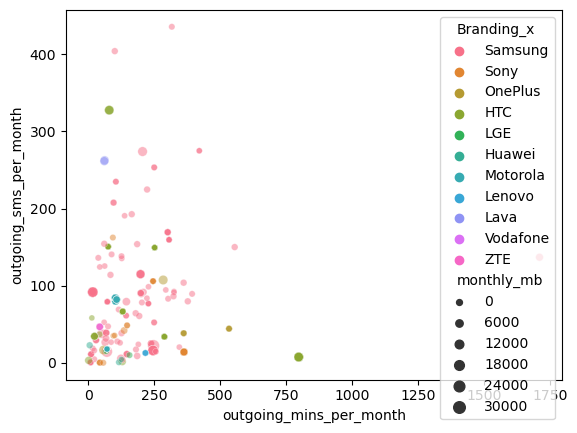

In [15]:
sns.scatterplot(x='outgoing_mins_per_month',
                y='outgoing_sms_per_month',
                size='monthly_mb',
                alpha=0.5,
                hue='Branding_x',
                data=dfKetQua)
plt.show()